In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
with open("./zip3_wt_cenrandratio_num-real-5000_ext-2000.txt", "r") as f:
    data = [float(row.strip("\n")) for row in f]

with open("./zip3_wt_cendata_ext-2000.txt", "r") as f:
    cen_ratio = [float(row.strip("ratio:\t")) for row in f if row.startswith("ratio")]

In [9]:
print(cen_ratio)

[0.2791214687873085]


In [10]:
print(data)

[0.7482267323615708, 1.2789905382165998, 0.8451022894564131, 0.5686759427616251, 0.9325565398653587, 0.7766820142303743, 0.9733374790092265, 0.9581886753808386, 1.1449847423644384, 0.5406438423980277, 1.5848982950937376, 0.8723197784972014, 0.609180406010296, 1.5508699245009463, 0.99801471900069, 1.6570103219595218, 0.8096316755258601, 1.1177927319727712, 1.6282092302339064, 0.6955241640442885, 1.0377696462498678, 0.5015352041020719, 0.7773762293866718, 0.9860243933699822, 0.5982046056736124, 0.9260401074977654, 0.8626537329622881, 1.141806575871879, 0.675917748015392, 0.9130058204526554, 0.9755030858409761, 1.6233697552083755, 1.2986470414428517, 0.8922840355251843, 1.5090249984137871, 1.2430438684418712, 0.811086938080666, 0.9458036460181837, 1.529793805888082, 0.8623748321014231, 0.9819842018899214, 0.7572196200657556, 0.3952674820508317, 1.1030547291706794, 0.8705214412124419, 1.0019792745503344, 0.7782246408750398, 0.6553272487485062, 0.8500709247366411, 0.7041513145023808, 0.8267

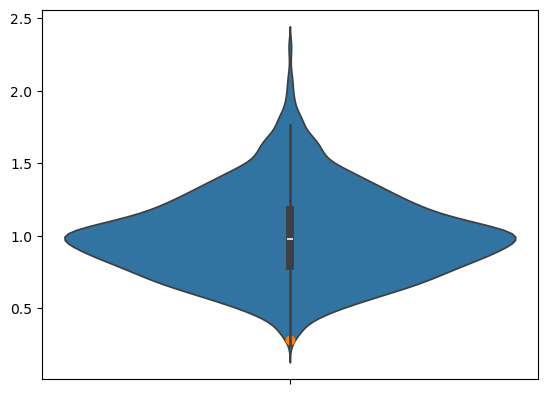

In [11]:
sns.violinplot(data)
plt.scatter(y = cen_ratio[0], x = 0)

In [12]:
bedgraph_file_path = "../../../mapping_project/zip3_del/peakcalling/dataset1_bdgcmp.bdg"

In [24]:
from collections import defaultdict

In [25]:
bedgraph_dictionary = defaultdict(list)

with open(bedgraph_file_path, "r") as f:
    bed_data = [row.strip().split("\t") for row in f]

In [26]:
for i in bed_data:
    bedgraph_dictionary[i[0]].append(list(map(float, i[1:])))

In [35]:
wiggle_dictionary = defaultdict(list)

for chr in bedgraph_dictionary.keys():
    for row in range(len(bedgraph_dictionary[chr])):
        if row != 0:
            if bedgraph_dictionary[chr][row][0] < bedgraph_dictionary[chr][row - 1][1]:
                bedgraph_dictionary[chr][row][0] = bedgraph_dictionary[chr][row - 1][1]
            
            if bedgraph_dictionary[chr][row][2] != 0:
                positions = list(range(int(bedgraph_dictionary[chr][row][0]) + 1, int(bedgraph_dictionary[chr][row][1]) + 1))
                wiggle_dictionary[chr] += [[position, bedgraph_dictionary[chr][row][2]] for position in positions]



In [39]:
print(wiggle_dictionary["chrI"][:5])

[[1940, 1.4066], [1941, 1.4066], [1942, 1.4066], [1943, 1.4066], [1944, 1.4066]]
